## Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import the file

In [2]:
df=pd.read_csv(r"F:\mohit_dell\download\Airbnb NYC 2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Info of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Check null values

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Adding a revenue column

In [5]:
df['revenue']=df.price*df.minimum_nights
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800


## Standard deviation of price

In [6]:
df.price.std()

240.15416974718727

## Now we are finding & removing the outliers from data in price column

In [7]:
mean = df['price'].mean()
stdev = df['price'].std()

# filter the DataFrame based on the condition
filtered_df = df[(df['price'] > mean - 3*stdev) & (df['price'] < mean + 3*stdev)]

filtered_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55


## Now we have filtered dataset

<Axes: xlabel='price', ylabel='room_type'>

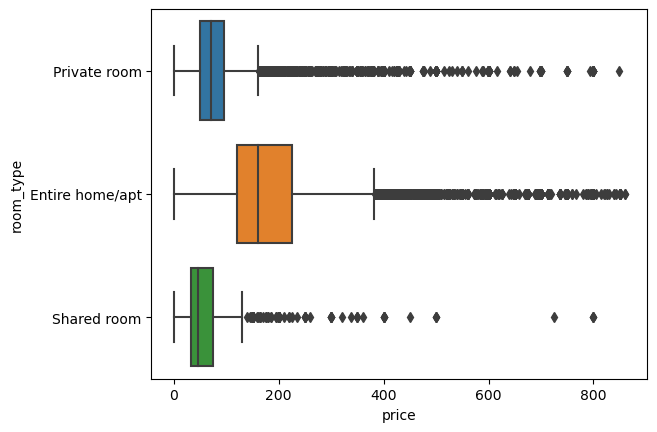

In [8]:
import seaborn as sns
sns.boxplot(data=filtered_df, x='price',y='room_type')

In above visualization we can see 860 is max price in price column.

## Price vizualization without showing outliers

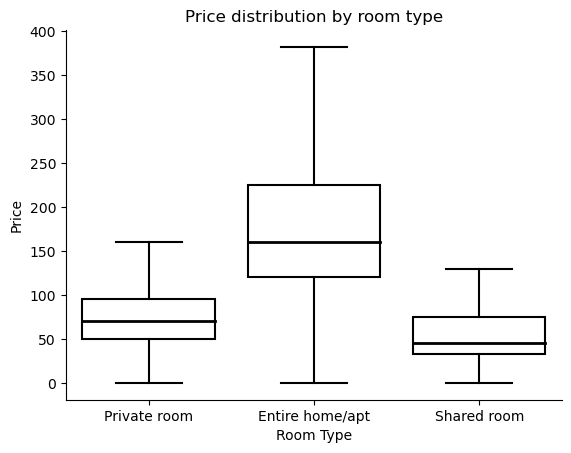

In [9]:
import seaborn as sns

# Assuming filtered_df is a Pandas DataFrame with the data to be plotted
sns.boxplot(data=filtered_df, x='room_type', y='price', 
            boxprops=dict(facecolor='white', edgecolor='black'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'), 
            medianprops=dict(color='black', linewidth=2), 
            showfliers=False, 
            showmeans=False, 
            showcaps=True, 
            notch=False)
sns.despine()
plt.title('Price distribution by room type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.show()


## Filling the null values

In [10]:
df.fillna({"reviews_per_month":0},inplace=True)
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,600
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2700
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,158
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,158
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,150


## Group by the neighbourhood_group with reviews_per_month

In [11]:
df.groupby('neighbourhood_group')['reviews_per_month'].agg({'min', 'max', 'sum'})

,min,max,sum
neighbourhood_group,,,
Bronx,0.0,10.34,1609.94
Brooklyn,0.0,14.00,21104.98
Manhattan,0.0,58.50,21158.08
Queens,0.0,20.94,8879.05
Staten Island,0.0,10.12,587.99


## Room type on neighbourhood_group

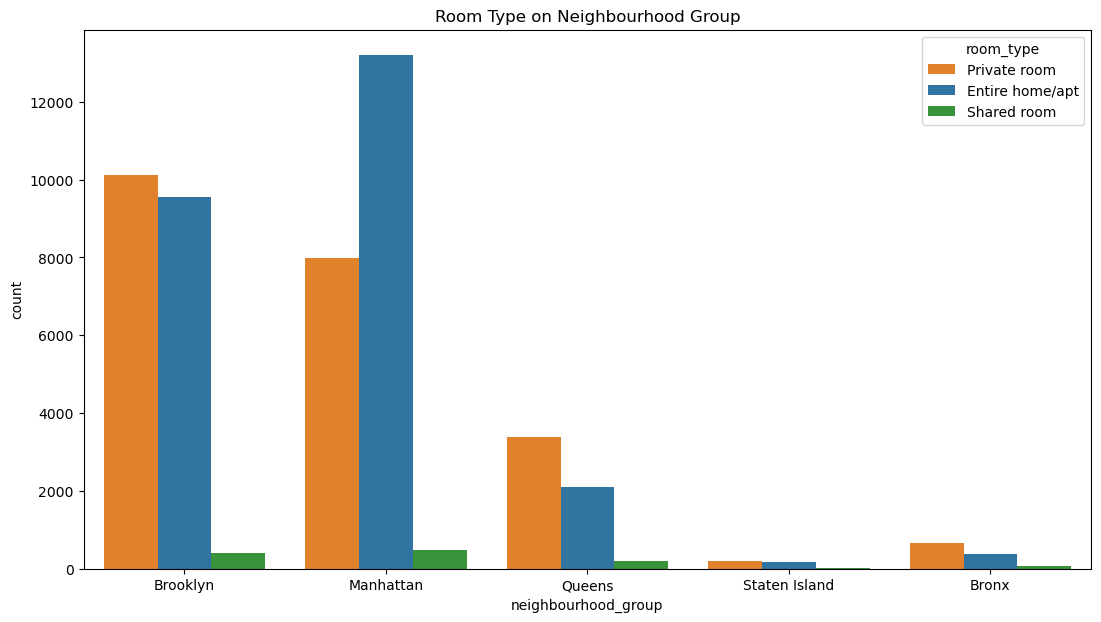

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the colors for each room type
colors = {'Entire home/apt': '#1f77b4', 'Private room': '#ff7f0e', 'Shared room': '#2ca02c'}

# Set the figure size and title
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")

# Create the countplot with the specified colors and variables
sns.countplot(x='neighbourhood_group', hue='room_type', palette=colors, data=df)

# Show the plot
plt.show()


##  Neighbourhood Group vs. Availability Room

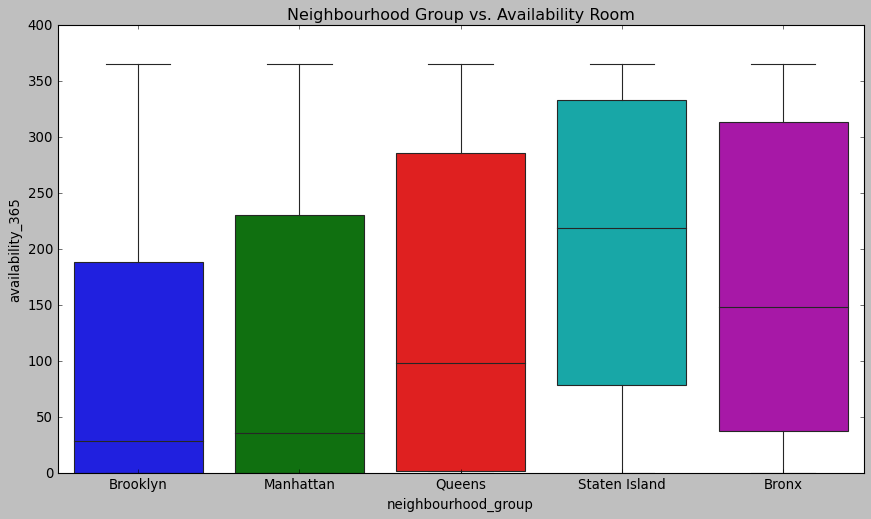

In [13]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')
plt.show()

## Price with respect to room type

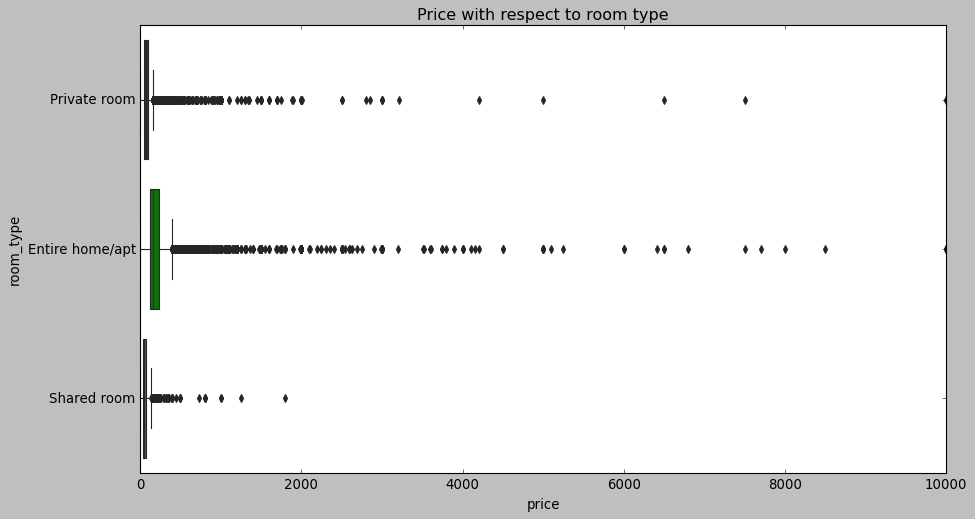

In [14]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Price with respect to room type")
sns.boxplot(data=df, x='price',y='room_type')
plt.show()

## Group by neighbourhood_group & price

In [15]:
df.groupby('neighbourhood_group')['price'].agg({'min', 'max', 'mean','median'})

,min,median,max,mean
neighbourhood_group,,,,
Bronx,0,65.0,2500,87.496792
Brooklyn,0,90.0,10000,124.383207
Manhattan,0,150.0,10000,196.875814
Queens,10,75.0,10000,99.517649
Staten Island,13,75.0,5000,114.812332


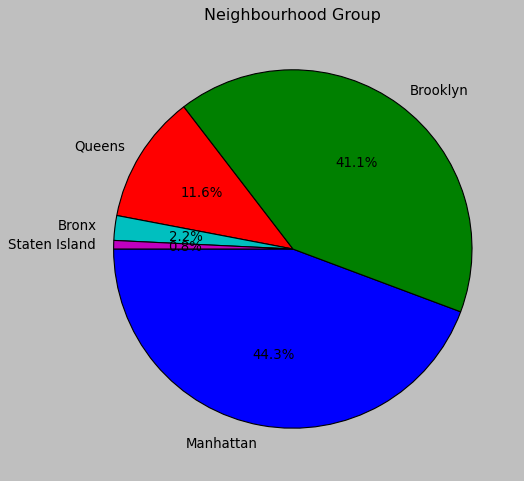

In [16]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2040\1563845319.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(x='neighbourhood_group', y='value', hue='stat', data=melted_df, kind='bar', alpha=0.8, ci='sd')


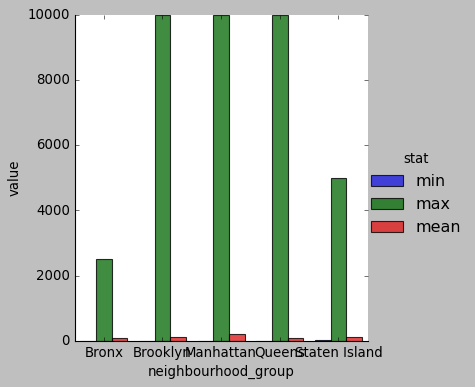

In [17]:
import seaborn as sns

# Aggregate the data
agg_df = df.groupby('neighbourhood_group')['price'].agg({'min', 'max', 'mean'})

# Reset the index to make the "neighbourhood_group" column a regular column
agg_df = agg_df.reset_index()

# Melt the DataFrame to create a "variable" column with the aggregation function names
melted_df = pd.melt(agg_df, id_vars=['neighbourhood_group'], var_name='stat')

# Plot the data
sns.catplot(x='neighbourhood_group', y='value', hue='stat', data=melted_df, kind='bar', alpha=0.8, ci='sd')


## Total value counts of neighbourhood (Top=10)

<Axes: >

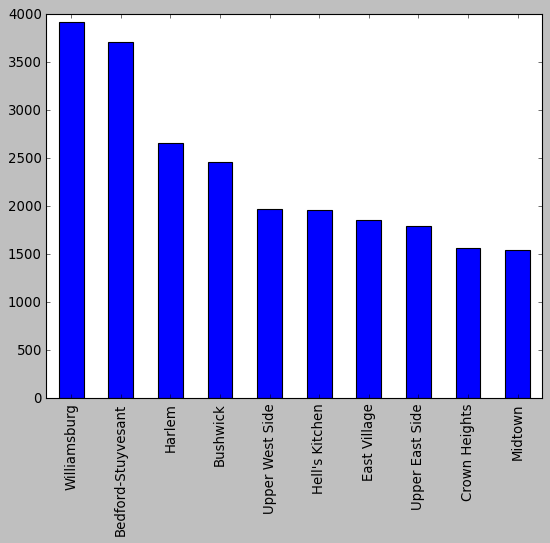

In [18]:
df.neighbourhood.value_counts().head(10).plot(kind='bar')

## Top 10 Host counts

<Axes: >

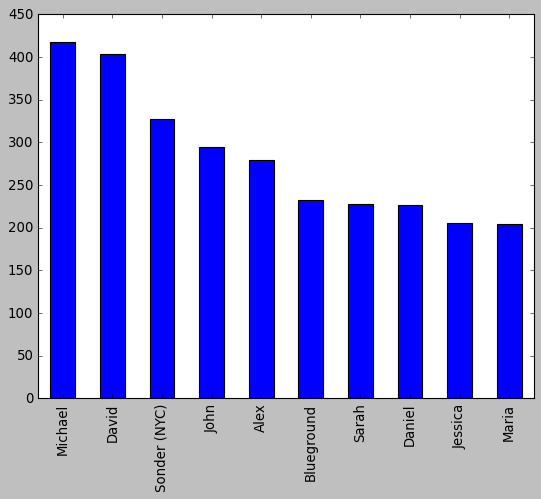

In [19]:
df.host_name.value_counts().head(10).plot(kind='bar')

## Top 10 Hostid count

<Axes: >

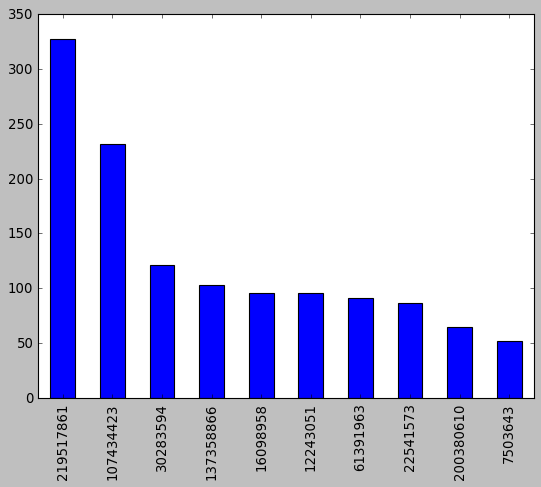

In [20]:
df.host_id.value_counts().head(10).plot(kind='bar')

## Total counts of each type of room

In [21]:
room_type1 = df.room_type.value_counts()
df_room_type = pd.DataFrame(room_type1)

In [22]:
df_room_type.head()

,room_type
Entire home/apt,25409
Private room,22326
Shared room,1160


## Total revenue generated from each type of room

In [23]:
revenue=df.groupby('room_type')['revenue'].sum()
revenue=pd.DataFrame(revenue)
revenue

,revenue
room_type,
Entire home/apt,47981638
Private room,14357673
Shared room,463029


Text(0.5, 1.0, 'Distribution of Revenue by Room type')

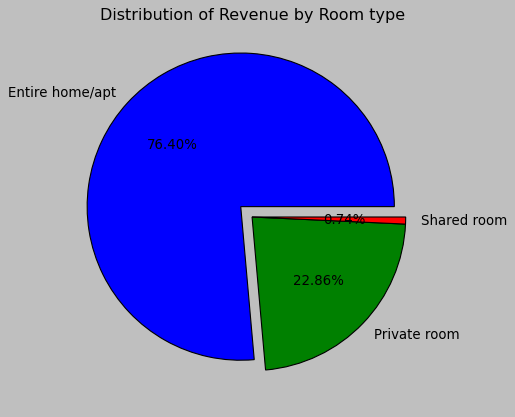

In [24]:
plt.pie(revenue.revenue,labels=revenue.index,autopct='%0.2f%%',explode=[0.1,0,0])
plt.title("Distribution of Revenue by Room type")

Text(0.5, 1.0, 'Distribution by Room type')

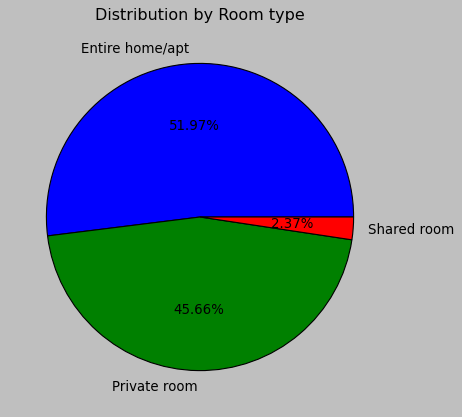

In [25]:
plt.pie(df_room_type.room_type,labels=df_room_type.index,autopct="%0.2f%%",radius=1)
plt.title("Distribution by Room type")

## Counts of neighbourhood_group

In [26]:
df_neighbourhood_group=pd.DataFrame(df.neighbourhood_group.value_counts())
df_neighbourhood_group

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


<BarContainer object of 5 artists>

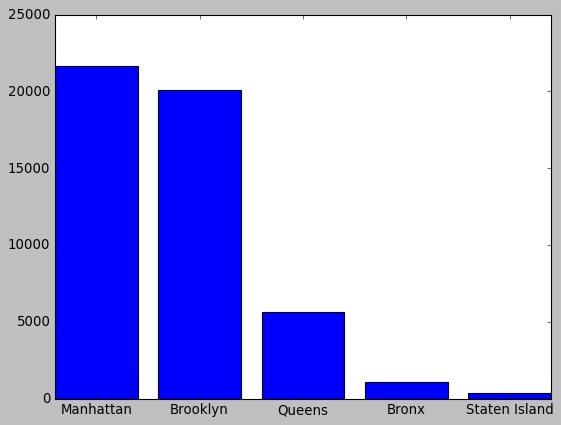

In [27]:
plt.bar(df_neighbourhood_group.index,df_neighbourhood_group.neighbourhood_group)

In [28]:
df1=df[["neighbourhood_group","room_type"]]
df1

,neighbourhood_group,room_type
0,Brooklyn,Private room
1,Manhattan,Entire home/apt
2,Manhattan,Private room
3,Brooklyn,Entire home/apt
4,Manhattan,Entire home/apt
...,...,...
48890,Brooklyn,Private room
48891,Brooklyn,Private room
48892,Manhattan,Entire home/apt
48893,Manhattan,Shared room


## Distribution of private rooms by neighbourhood group

In [29]:
my_dict=dict(zip(df.neighbourhood_group,df.room_type))
my_dict

{'Brooklyn': 'Private room',
 'Manhattan': 'Private room',
 'Queens': 'Private room',
 'Staten Island': 'Private room',
 'Bronx': 'Entire home/apt'}

In [30]:
private_rooms=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Private room").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Private Rooms by Neighbourhood Group')

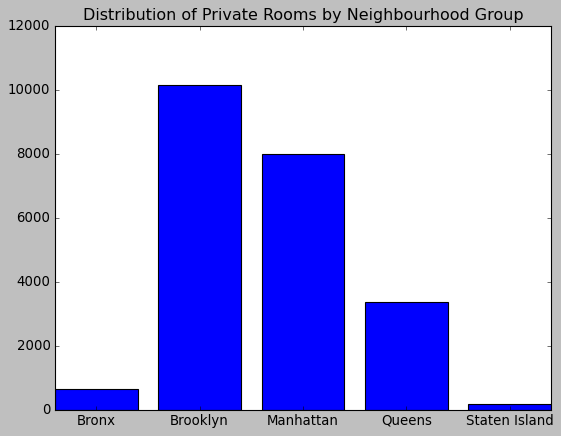

In [31]:
plt.bar(private_rooms['neighbourhood_group'],private_rooms['count'])
plt.title("Distribution of Private Rooms by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Private Rooms by Neighbourhood Group')

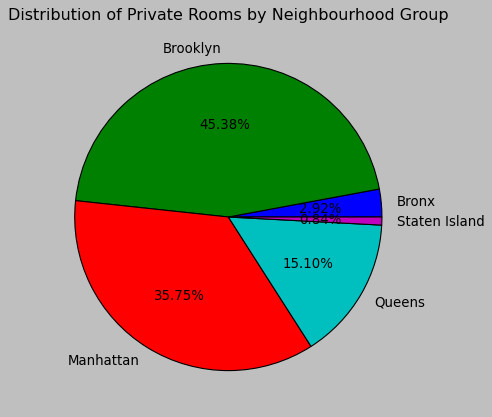

In [32]:
plt.pie(private_rooms['count'],labels=private_rooms['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Private Rooms by Neighbourhood Group")

## Distribution of Shared Rooms by Neighbourhood Group

In [33]:
shared_rooms=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Shared room").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Shared Rooms by Neighbourhood Group')

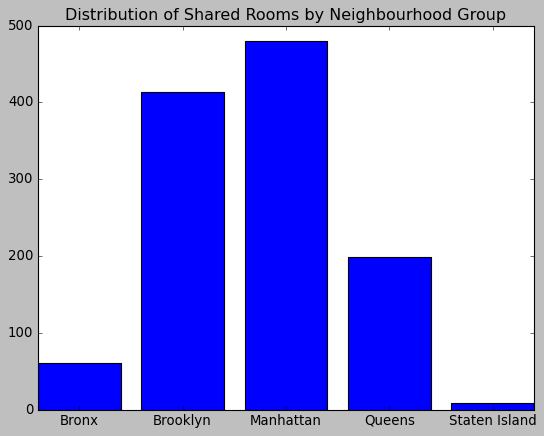

In [34]:
plt.bar(shared_rooms['neighbourhood_group'],shared_rooms['count'])
plt.title("Distribution of Shared Rooms by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Shared Rooms by Neighbourhood Group')

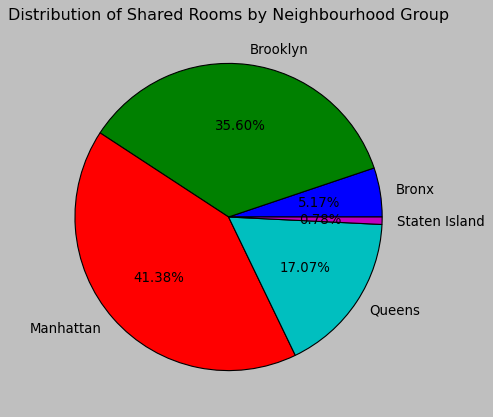

In [35]:
plt.pie(shared_rooms['count'],labels=shared_rooms['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Shared Rooms by Neighbourhood Group")

## Distribution of Entire home by Neighbourhood Group

In [36]:
entire_home=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Entire home/apt").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Entire home by Neighbourhood Group')

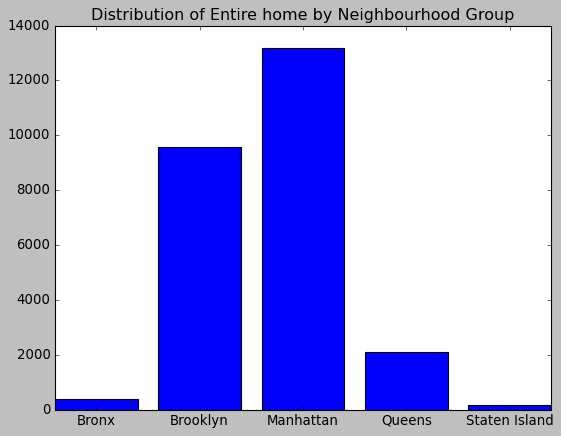

In [37]:
plt.bar(entire_home['neighbourhood_group'],entire_home['count'])
plt.title("Distribution of Entire home by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Entire home by Neighbourhood Group')

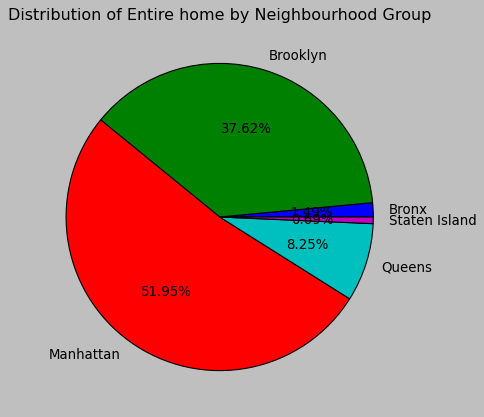

In [38]:
plt.pie(entire_home['count'],labels=entire_home['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Entire home by Neighbourhood Group")

## Scatterplot with latitude & Longitude

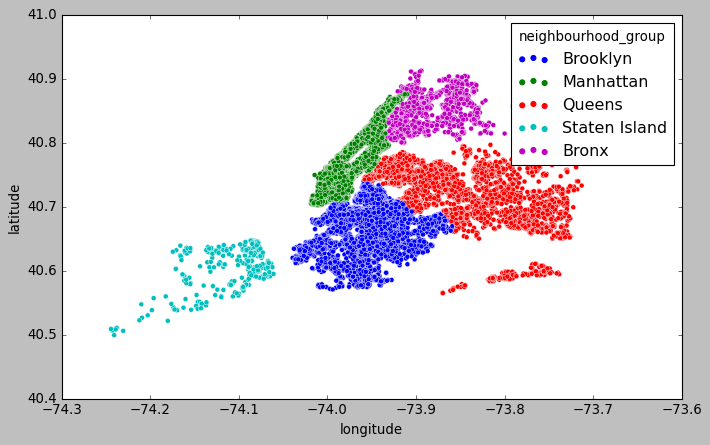

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.ioff()
